In [2]:

import  matplotlib.pyplot as plt
import numpy as np
import matplotlib
matplotlib.rc("font", family = "MicroSoft YaHei")

In [62]:
def plot_fig(name, x, y, xlabel, types):
    plt.clf()
    plt.plot(x, y, types)
    plt.xlabel(xlabel)
    plt.ylabel('MRR')
    plt.grid(True)
    plt.savefig(name)
    

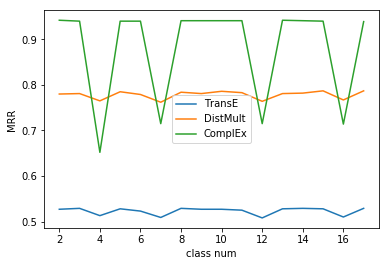

In [3]:
mrr_wn_transe_rel = [0.527,0.529,0.513,0.528,0.523,0.509,0.529,0.527,0.527,0.525,0.508,0.528,0.529,0.528,0.510,0.529]
mrr_wn_distmult_rel = [0.780,0.781,0.765,0.785,0.779,0.762,0.784,0.781,0.786,0.783,0.764,0.781,0.782,0.787,0.767,0.787 ]
mrr_wn_complex_rel = [0.942,0.940,0.652,0.940,0.940,0.715,0.941,0.941,0.941,0.941,0.715,0.942,0.941,0.940,0.714,0.939 ]

x = range(2, 18, 1)
plt.plot(x, mrr_wn_transe_rel, label='TransE')
plt.plot(x, mrr_wn_distmult_rel, label='DistMult')
plt.plot(x, mrr_wn_complex_rel, label='ComplEx')
plt.xlabel('class num')
plt.ylabel('MRR')
plt.legend()


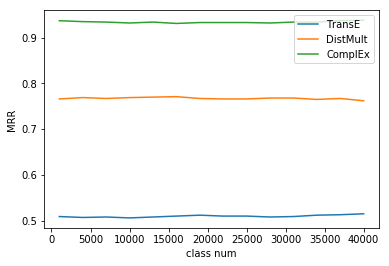

In [12]:
mrr_wn_transe_ent = [0.509,0.507,0.508,0.506,0.508,0.510,0.512,0.510,0.510,0.508,0.509,0.512,0.513,0.515 ]
mrr_wn_distmult_ent = [0.766,0.769,0.767,0.769,0.770,0.771,0.767,0.766,0.766,0.768,0.768,0.765,0.767,0.762 ]
mrr_wn_complex_ent = [0.937,0.935,0.934,0.932,0.934,0.931,0.933,0.933,0.933,0.932,0.934,0.934,0.937,0.938  ]

x = range(1000, 41000, 3000)
plt.plot(x, mrr_wn_transe_ent, label='TransE')
plt.plot(x, mrr_wn_distmult_ent, label='DistMult')
plt.plot(x, mrr_wn_complex_ent, label='ComplEx')
plt.xlabel('class num')
plt.ylabel('MRR')
plt.legend()



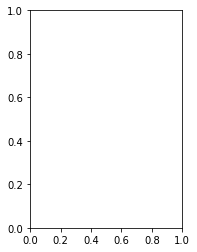

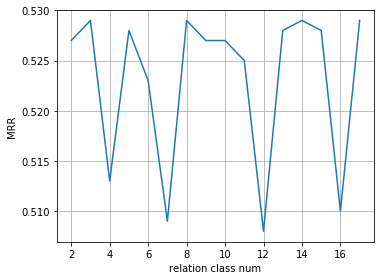

In [32]:
x = range(1000, 41000, 3000)
plt.subplot(121)
plt.figure(figsize=(10,4))
plt.plot(x, mrr_wn_transe_ent, label='TransE')
# plt.plot(x, mrr_wn_distmult_ent, label='DistMult')
# plt.plot(x, mrr_wn_complex_ent, label='ComplEx')
plt.xlabel('entity class num')
plt.ylabel('MRR')
plt.grid(True)
plt.tight_layout()

# plt.legend()
plt.subplot(122)
x = range(2, 18)
plt.plot(x, mrr_wn_transe_rel, label='TransE')
plt.xlabel('relation class num')
plt.ylabel('MRR')
plt.grid(True)
plt.tight_layout()
# plt.legend()

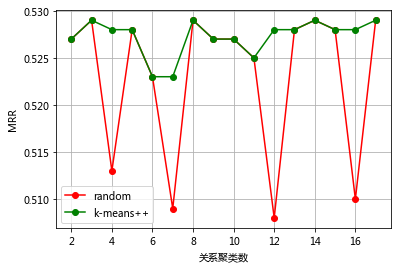

In [70]:
# fig, (axes1, axes2) = plt.subplots(1, 2, figsize=(16, 5))

x = range(1000, 41000, 3000)
# axes1.plot(x, mrr_wn_transe_ent, 'bo-', label='TransE')
# axes1.set_xlabel('实体聚类数')
# axes1.set_ylabel('MRR')
# axes1.grid(True)
plot_fig('transe_mrr_wn_ent', x, mrr_wn_transe_ent, '实体聚类数', 'bo-')

x = range(2, 18)
# axes2.plot(x, mrr_wn_transe_rel, 'ro-', label='TransE')
# axes2.set_xlabel('关系聚类数')
# axes2.set_ylabel('MRR')
# axes2.grid(True)

# fig.savefig('transe_mrr_wn')
plot_fig('transe_mrr_wn_rel', x, mrr_wn_transe_rel, '关系聚类数', 'ro-')


mrr_wn_transe_rel_k = [0.527,0.529,0.528,0.528,0.523,0.523,0.529,0.527,0.527,0.525,0.528,0.528,0.529,0.528,0.528,0.529 ]
# plot_fig('transe_mrr_wn_rel_k++', x, mrr_wn_transe_rel_k, '关系聚类数', 'ro-')
plt.clf()
plt.plot(x, mrr_wn_transe_rel, 'ro-', label='random')
plt.plot(x, mrr_wn_transe_rel_k, 'go-', label='k-means++')
plt.xlabel('关系聚类数')
plt.ylabel('MRR')
plt.legend()
plt.grid(True)
plt.savefig('transe_mrr_wn_rel_k')

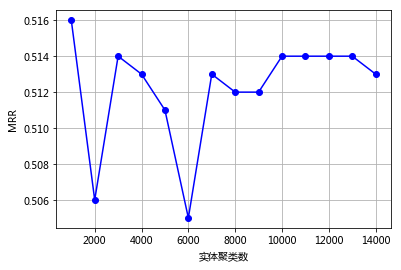

In [69]:
mrr_fb15k_transe_rel = [0.502,0.501,0.502,0.501,0.500,0.501,0.501,0.500,0.501,0.500,0.500,0.501,0.499 ]
mrr_fb15k_transe_ent = [0.516,0.506,0.514,0.513,0.511,0.505,0.513,0.512,0.512,0.514,0.514,0.514,0.514,0.513 ]
x1 = range(100, 1400, 100)
x2 = range(1000, 15000, 1000)
plot_fig('transe_mrr_fb15k_rel', x1, mrr_fb15k_transe_rel, '关系聚类数', 'ro-')
plot_fig('transe_mrr_fb15k_ent', x2, mrr_fb15k_transe_ent, '实体聚类数', 'bo-')


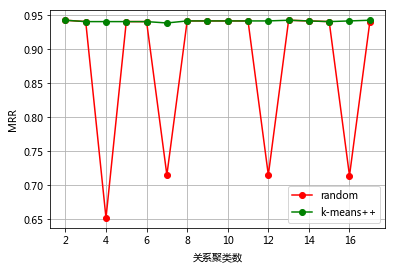

In [76]:
mrr_fb15k_complex_rel = [0.620,0.619,0.620,0.616,0.617,0.618,0.614,0.618,0.617,0.615,0.617,0.616 ]
mrr_fb15k_complex_ent = [0.649,0.657,0.656,0.653,0.651,0.651,0.651,0.648,0.648,0.647,0.646,0.646,0.646,0.644 ]
mrr_wn18_complex_rel = [0.942,0.940,0.652,0.940,0.940,0.715,0.941,0.941,0.941,0.941,0.715,0.942,0.941,0.940,0.714,0.939 ]
mrr_wn18_complex_ent = [0.937,0.935,0.934,0.932,0.934,0.931,0.933,0.933,0.933,0.932,0.934,0.934,0.937,0.938 ]
x1_fb15k = list(range(100, 1200, 100))
x1_fb15k.append(1300)
x2_fb15k = range(1000, 15000, 1000)
x1_wn18 = range(2, 18)
x2_wn18 = range(1000, 41000, 3000)
plot_fig('complex_mrr_fb15k_rel', x1_fb15k, mrr_fb15k_complex_rel, '关系聚类数', 'ro-')
plot_fig('complex_mrr_fb15k_ent', x2_fb15k, mrr_fb15k_complex_ent, '实体聚类数', 'bo-')
plot_fig('complex_mrr_wn_rel', x1_wn18, mrr_wn18_complex_rel, '关系聚类数', 'ro-')
plot_fig('complex_mrr_wn_ent', x2_wn18, mrr_wn18_complex_ent, '实体聚类数', 'bo-')
mrr_wn_complex_rel_k = [0.942,0.940,0.940,0.940,0.940,0.938,0.941,0.941,0.941,0.941,0.941,0.942,0.941,0.940,0.941,0.942 ]
# plot_fig('transe_mrr_wn_rel_k++', x, mrr_wn_transe_rel_k, '关系聚类数', 'ro-')
plt.clf()
plt.plot(x, mrr_wn_complex_rel, 'ro-', label='random')
plt.plot(x, mrr_wn_complex_rel_k, 'go-', label='k-means++')
plt.xlabel('关系聚类数')
plt.ylabel('MRR')
plt.legend()
plt.grid(True)
plt.savefig('complex_mrr_wn_rel_k')

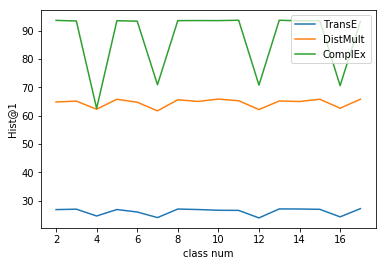

In [48]:
h1_wn_transe_rel = [26.80,26.95,24.54,26.83,25.95,23.98,27.00,26.82,26.57,26.52,23.86,27.04,27.01,26.90,24.23,27.14]
h1_wn_distmult_rel = [64.86,65.16,62.30,65.82,64.77,61.72,65.63,65.05,65.88,65.29,62.19,65.20,65.02,65.82,62.65,65.83]
h1_wn_complex_rel = [93.71,93.49,62.58,93.60,93.43,70.97,93.62,93.65,93.63,93.76,70.82,93.76,93.57,93.59,70.63,93.32]

x = range(2, 18, 1)
plt.plot(x, h1_wn_transe_rel, label='TransE')
plt.plot(x, h1_wn_distmult_rel, label='DistMult')
plt.plot(x, h1_wn_complex_rel, label='ComplEx')
plt.xlabel('class num')
plt.ylabel('Hist@1')
plt.legend()

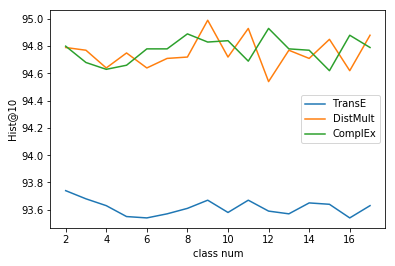

In [10]:
h10_wn_transe_rel = [93.74,93.68,93.63,93.55,93.54,93.57,93.61,93.67,93.58,93.67,93.59,93.57,93.65,93.64,93.54,93.63]
h10_wn_distmult_rel = [94.79,94.77,94.64,94.75,94.64,94.71,94.72,94.99,94.72,94.93,94.54,94.77,94.71,94.85,94.62,94.88]
h10_wn_complex_rel = [94.80,94.68,94.63,94.66,94.78,94.78,94.89,94.83,94.84,94.69,94.93,94.78,94.77,94.62,94.88,94.79]
x = range(2, 18, 1)
plt.plot(x, h10_wn_transe_rel, label='TransE')
plt.plot(x, h10_wn_distmult_rel, label='DistMult')
plt.plot(x, h10_wn_complex_rel, label='ComplEx')
plt.xlabel('class num')
plt.ylabel('Hist@10')
plt.legend()

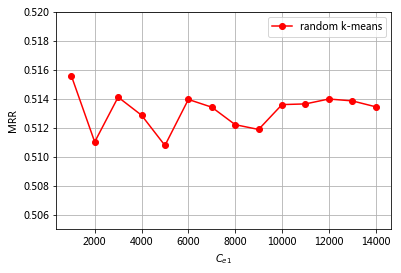

In [6]:
transe_fb15k_mrr_rel = [0.501581,0.501229,0.501891,0.501317,0.501289,0.500837,0.500713,0.500453,0.501351,0.499876,0.500168,0.500647,0.499498 ]
transe_fb15k_mrr_ent = [0.515581,0.511006,0.514096,0.512850,0.510762,0.513938,0.513403,0.512197,0.511867,0.513582,0.513629,0.513967,0.513838,0.513431 ]
x1 = range(100, 1400, 100)
x2 = range(1000, 15000, 1000)
plt.plot(x1, transe_fb15k_mrr_rel, 'ro-', label='random k-means')
plt.ylim((0.495, 0.505))
plt.xlabel('$C_{r1}$')
plt.ylabel('MRR')
plt.legend()
plt.grid(True)
plt.savefig('transe_fb15k_mrr_rel',dpi=500,bbox_inches = 'tight')
plt.clf()
plt.plot(x2, transe_fb15k_mrr_ent, 'ro-', label='random k-means')
plt.ylim((0.505, 0.520))
plt.xlabel('$C_{e1}$')
plt.ylabel('MRR')
plt.grid(True)
plt.legend()
plt.savefig('transe_fb15k_mrr_ent',dpi=500,bbox_inches = 'tight')


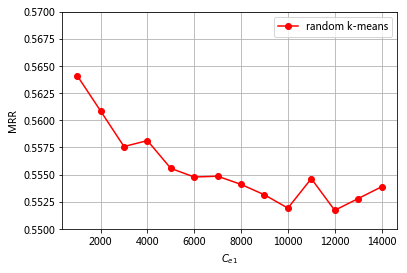

In [7]:
distmult_fb15k_mrr_rel = [0.568063,0.568696,0.569205,0.568635,0.567196,0.568677,0.569184,0.568769,0.568427,0.570727,0.570306,0.570938,0.570366 ]
distmult_fb15k_mrr_ent = [0.564107,0.560860,0.557582,0.558133,0.555573,0.554782,0.554856,0.554101,0.553145,0.551919,0.554636,0.551718,0.552796,0.553882 ]
plt.plot(x1, distmult_fb15k_mrr_rel, 'ro-', label='random k-means')
plt.ylim((0.560, 0.575))
plt.xlabel('$C_{r1}$')
plt.ylabel('MRR')
plt.grid(True)
plt.legend()
plt.savefig('distmult_fb15k_mrr_rel',dpi=500,bbox_inches = 'tight')
plt.clf()
plt.plot(x2, distmult_fb15k_mrr_ent, 'ro-', label='random k-means')
plt.ylim((0.550, 0.570))
plt.xlabel('$C_{e1}$')
plt.ylabel('MRR')
plt.grid(True)
plt.legend()
plt.savefig('distmult_fb15k_mrr_ent',dpi=500,bbox_inches = 'tight')

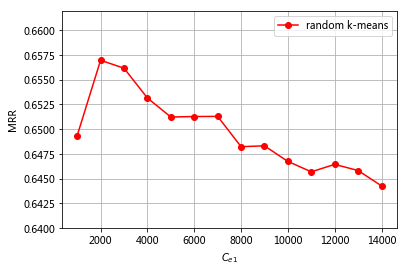

In [8]:
complex_fb15k_mrr_rel = [0.619802,0.618931,0.618045,0.618074,0.618963,0.617598,0.616227,0.618189,0.616643,0.618553,0.616871,0.618362,0.616496  ]
complex_fb15k_mrr_ent = [0.649342,0.656973,0.656168,0.653155,0.651231,0.651277,0.651294,0.648227,0.648314,0.646735,0.645685,0.646439,0.645814,0.644260 ]
plt.plot(x1, complex_fb15k_mrr_rel, 'ro-', label='random k-means')
plt.ylim((0.610, 0.625))
plt.xlabel('$C_{r1}$')
plt.ylabel('MRR')
plt.grid(True)
plt.legend()
plt.savefig('complex_fb15k_mrr_rel',dpi=500,bbox_inches = 'tight')
plt.clf()
plt.plot(x2, complex_fb15k_mrr_ent, 'ro-', label='random k-means')
plt.ylim((0.640, 0.662))
plt.xlabel('$C_{e1}$')
plt.ylabel('MRR')
plt.grid(True)
plt.legend()
plt.savefig('complex_fb15k_mrr_ent',dpi=500,bbox_inches = 'tight')

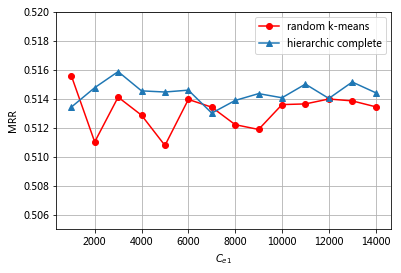

In [9]:
transe_fb15k_mrr_rel = [0.501581,0.501229,0.501891,0.501317,0.501289,0.500837,0.500713,0.500453,0.501351,0.499876,0.500168,0.500647,0.499498  ]
transe_fb15k_mrr_ent = [0.515581,0.511006,0.514096,0.512850,0.510762,0.513938,0.513403,0.512197,0.511867,0.513582,0.513629,0.513967,0.513838,0.513431 ]
transe_fb15k_mrr_rel_comp = [0.501860,0.501885,0.501781,0.502461,0.501393,0.501970,0.500129,0.500700,0.500422,0.500692,0.499623,0.500538,0.500597  ]
transe_fb15k_mrr_ent_comp = [0.513406,0.514749,0.515858,0.514529,0.514450,0.514579,0.512995,0.513868,0.514339,0.514053,0.514994,0.514007,0.515139,0.514401  ]
x1 = range(100, 1400, 100)
x2 = range(1000, 15000, 1000)
plt.plot(x1, transe_fb15k_mrr_rel, 'ro-', label='random k-means')
plt.plot(x1, transe_fb15k_mrr_rel_comp, '^-', label='hierarchic complete')
plt.ylim((0.495, 0.505))
plt.xlabel('$C_{r1}$')
plt.ylabel('MRR')
plt.legend()
plt.grid(True)
plt.savefig('transe_fb15k_mrr_rel_c',dpi=500,bbox_inches = 'tight')
plt.clf()
plt.plot(x2, transe_fb15k_mrr_ent, 'ro-', label='random k-means')
plt.plot(x2, transe_fb15k_mrr_ent_comp, '^-', label='hierarchic complete')
plt.ylim((0.505, 0.520))
plt.xlabel('$C_{e1}$')
plt.ylabel('MRR')
plt.legend()
plt.grid(True)
plt.savefig('transe_fb15k_mrr_ent_c',dpi=500,bbox_inches = 'tight')



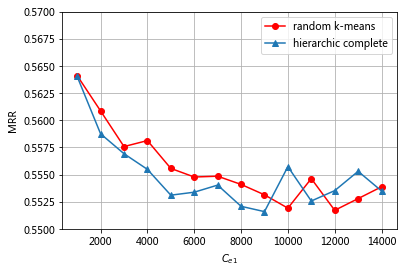

In [10]:
distmult_fb15k_mrr_rel = [0.568063,0.568696,0.569205,0.568635,0.567196,0.568677,0.569184,0.568769,0.568427,0.570727,0.570306,0.570938,0.570366 ]
distmult_fb15k_mrr_ent = [0.564107,0.560860,0.557582,0.558133,0.555573,0.554782,0.554856,0.554101,0.553145,0.551919,0.554636,0.551718,0.552796,0.553882 ]
distmult_fb15k_mrr_rel_comp = [0.566084,0.568859,0.569288,0.567388,0.566980,0.570853,0.569349,0.569389,0.570167,0.571082,0.572446,0.570360,0.570077  ]
distmult_fb15k_mrr_ent_comp = [0.564029,0.558757,0.556926,0.555485,0.553112,0.553385,0.554038,0.552088,0.551598,0.555735,0.552576,0.553529,0.555306,0.553499 ]
plt.plot(x1, distmult_fb15k_mrr_rel, 'ro-', label='random k-means')
plt.plot(x1, distmult_fb15k_mrr_rel_comp, '^-', label='hierarchic complete')
plt.ylim((0.560, 0.575))
plt.xlabel('$C_{r1}$')
plt.ylabel('MRR')
plt.grid(True)
plt.legend()
plt.savefig('distmult_fb15k_mrr_rel_c',dpi=500,bbox_inches = 'tight')
plt.clf()
plt.plot(x2, distmult_fb15k_mrr_ent, 'ro-', label='random k-means')
plt.plot(x2, distmult_fb15k_mrr_ent_comp, '^-', label='hierarchic complete')
plt.ylim((0.550, 0.570))
plt.xlabel('$C_{e1}$')
plt.ylabel('MRR')
plt.grid(True)
plt.legend()
plt.savefig('distmult_fb15k_mrr_ent_c',dpi=500,bbox_inches = 'tight')

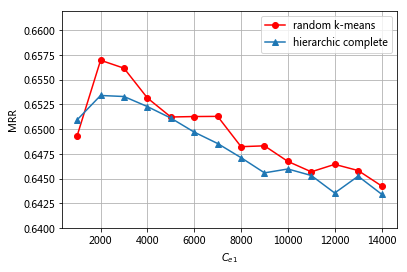

In [11]:
complex_fb15k_mrr_rel = [0.619802,0.618931,0.618045,0.618074,0.618963,0.617598,0.616227,0.618189,0.616643,0.618553,0.616871,0.618362,0.616496  ]
complex_fb15k_mrr_ent = [0.649342,0.656973,0.656168,0.653155,0.651231,0.651277,0.651294,0.648227,0.648314,0.646735,0.645685,0.646439,0.645814,0.644260 ]
complex_fb15k_mrr_rel_comp = [0.619614,0.618525,0.617403,0.618592,0.617820,0.618167,0.617897,0.618547,0.617975,0.617316,0.618084,0.617845,0.616535 ]
complex_fb15k_mrr_ent_comp = [0.650946,0.653409,0.653303,0.652285,0.651121,0.649702,0.648547,0.647116,0.645579,0.645971,0.645311,0.643541,0.645240,0.643427 ]
plt.plot(x1, complex_fb15k_mrr_rel, 'ro-', label='random k-means')
plt.plot(x1, complex_fb15k_mrr_rel_comp, '^-', label='hierarchic complete')
plt.ylim((0.610, 0.625))
plt.xlabel('$C_{r1}$')
plt.ylabel('MRR')
plt.grid(True)
plt.legend()
plt.savefig('complex_fb15k_mrr_rel_c',dpi=500,bbox_inches = 'tight')
plt.clf()
plt.plot(x2, complex_fb15k_mrr_ent, 'ro-', label='random k-means')
plt.plot(x2, complex_fb15k_mrr_ent_comp, '^-', label='hierarchic complete')
plt.ylim((0.640, 0.662))
plt.xlabel('$C_{e1}$')
plt.ylabel('MRR')
plt.legend()
plt.grid(True)
plt.savefig('complex_fb15k_mrr_ent_c',dpi=500,bbox_inches = 'tight')